# Lab 9: Dependency Parsing

***ในแล็บนี้เราจะศึกษาวิธีการคำนวณ Dependency Parsing และแสดงผลในรูปของ Parse Tree***

Dependency Parsing เป็น การวิเคราะห์ความสัมพันธ์ของแต่ละวลี/คำในประโยคในการอธิบายรูปแบบไวยากรณ์ของภาษา หรือ [วากยสัมพันธ์](https://www.wikiwand.com/th/วากยสัมพันธ์) (Syntax) โดยโครงสร้างไวยกรณ์จะถูกอธิบายโดยคำในประโยคและความสัมพันธ์ระหว่างคู่ของคำหรือวลี ซึ่งจะต่างจาก Context-Free Grammars ที่อธิบายโครงสร้างไวยากรณ์ในรูปของสูตรคณิตศาสตร์ เนื่องจากเทคนิคสมัยใหม่ด้าน Natural Language Processing (NLP) มักใช้โมเดลความน่าจะเป็นในการอธิบาย จึงทำให้ Dependency Parsing เป็นที่นิยม

Dependency Parsing อธิบายความสัมพันธ์ระหว่างคำ/วลี ในรูปแบบพึ่งพา (Dependency Relation) ระหว่างคู่ของคำ/วลี ที่เรียกว่า Head และ Dependent เขียนอธิบายด้วยลูกศรจาก Head ไปหา Dependent โดย Head จะเป็นตัวกำหนดว่า Dependent ต้องเป็นคำชนิดไหน อยู่ในรูปไหน​ มีความสัมพันธ์กันอย่างไร​ ดังนั้นแต่ละ Dependent จะมี Head ได้ตัวเดียวเท่านั้น

**References**
1. https://pythainlp.github.io/tutorials/notebooks/Thai_Dependency_Parser.html
2. https://medium.com/super-ai-engineer/ทำความรู้จัก-dependency-parser-กับภาษาไทย-ee36bb3309c8
3. https://web.stanford.edu/~jurafsky/slp3/old_oct19/15.pdf

## Install Libraries

* pythainlp เป็น interface สำหรับเรียกใช้ spacy_thai
* spacy_thai เป็นไลบรารี่สำหรับตัดทำ หา POS-tagger และทำ Dependency Parsing
* deplacy สำหรับแสดงผล Dependency Parsing
* graphviz สำหรับแสดงผลในรูปของกราฟ

In [10]:
!pip install pythainlp
!pip install spacy_thai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pythainlp
from pythainlp.parse import dependency_parsing

import graphviz
import deplacy

pythainlp.__version__

'4.0.1'

## Parsing

สามารถเรียกใช้ฟังก์ชัน [`dependency_parsing`](https://pythainlp.github.io/dev-docs/api/parse.html#pythainlp.parse.dependency_parsing) ในการทำ Dependency Parsing ได้ โดยผลลัพธ์มีบ่งบอก

| คอลัมน์ | คำอธิบาย |
|---|---|
| 1 | ลำดับของคำ |
| 2 | คำ |
| 3 | Part-of-Speech (POS) อิงตาม [Universal Dependencies (UD)](https://pythainlp.github.io/docs/4.0/api/tag.html) |
| 4 | POS อิงตาม [ORCHID](https://pythainlp.github.io/docs/4.0/api/tag.html) |
| 5 | ลำดับของ dependent ในขณะที่ลำดับของคำ คือ ลำดับของ head |
| 6 | ชนิดของความสัมพันธ์แบบ Dependency อิงจาก [Universal Dependencies (UD)](https://universaldependencies.org/en/dep/)  |

In [16]:
s = "แผนกนี้กำลังเผชิญกับความท้าทายใหม่"

In [17]:
dep_parse = dependency_parsing(s, engine="spacy_thai")
print(dep_parse)

1	แผนก		NOUN	NCMN	_	4	nsubj	_	SpaceAfter=No
2	นี้		DET	DDAC	_	1	det	_	SpaceAfter=No
3	กำลัง		AUX	XVBM	_	4	aux	_	SpaceAfter=No
4	เผชิญ		VERB	VSTA	_	0	ROOT	_	SpaceAfter=No
5	กับ		ADP	RPRE	_	6	case	_	SpaceAfter=No
6	ความ		PART	FIXN	_	4	obl	_	SpaceAfter=No
7	ท้าทาย		VERB	VACT	_	6	acl	_	SpaceAfter=No
8	ใหม่		ADV	ADVN	_	7	advmod	_	SpaceAfter=No


In [18]:
deplacy.render(dep_parse ,WordRight=True)

 nsubj ╔════════>╔═ NOUN แผนก
   det ║         ╚> DET  นี้
   aux ║ ╔════════> AUX  กำลัง
  ROOT ╚═╚═╔═══════ VERB เผชิญ
  case     ║ ╔════> ADP  กับ
   obl     ╚>╚═╔═══ PART ความ
   acl         ╚>╔═ VERB ท้าทาย
advmod           ╚> ADV  ใหม่


ใช้ graphviz แสดงผลในรูปของต้นไม้ (Parse Tree) แต่ว่าจะสูญเสียทิศทางของลูกศรที่บ่งบอกความสัมพันธ์ Dependency Relation ว่าคู่กับคำใด

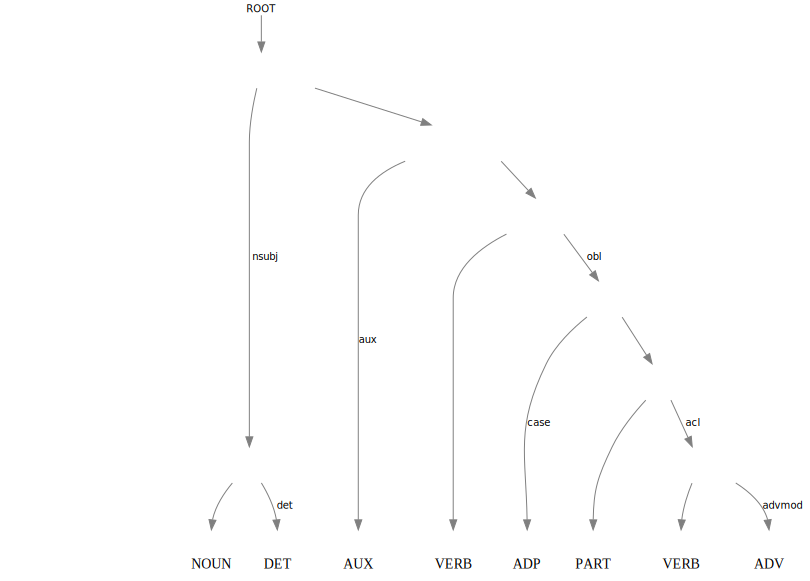

In [19]:
graphviz.Source(deplacy.dot(dep_parse))

----